# Linear Models

Apply a linear classifier, `LogisticRegression()` to the heart disease dataset.

The data is hosted on UCI https://archive.ics.uci.edu/ml/datasets/Heart+Disease

we will need `heart-disease.names` and `processed-hungarian.data` from the data folder on UCI.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare the data

In [9]:
!more "C:\Users\mitra\Downloads\heat_disease\heart-disease.names"

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

### Data set interpretation

The first 13 columns are features to predict heart disease in column 14 (num).

num: diagnosis of heart disease (angiographic disease status)  
- Value 0 (no disease): < 50% diameter narrowing
- Value 1 (heart disease) : > 50% diameter narrowing

### The data 

In [11]:

# Open the file for reading
with open(r"C:\Users\mitra\Downloads\heat_disease\processed.hungarian.data", "r") as file:
    # Initialize a line counter
    line_count = 0
    
    # Loop through the file line by line
    for line in file:
        # Print the current line
        print(line, end="")
        line_count += 1
        if line_count == 10: break
    

28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0
34,0,2,130,161,0,0,190,0,0,?,?,?,0


In [3]:
!head "C:\Users\mitra\Downloads\heat_disease\processed.hungarian.data"

28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0
34,0,2,130,161,0,0,190,0,0,?,?,?,0


In [14]:
data = pd.read_csv(r'C:\Users\mitra\Downloads\heat_disease\processed.hungarian.data', 
                   na_values='?', 
                   names=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                            'ca', 'thal', 'num'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


### Drop columns with many missing values 

In [16]:
data = data.drop(columns=['slope', 'ca', 'thal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


### Fill missing values with mean

In [17]:
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.21843,139.129693,0.303754,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.596463,64.947939,0.251964,0.46008,23.549459,0.459878,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.00000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,0.000000,0.00000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.500000,0.000000,0.00000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.00000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.00000,190.000000,1.000000,5.000000,1.000000


In [19]:
data['num'].value_counts()

0    188
1    106
Name: num, dtype: int64

### A pairplot to get an overview

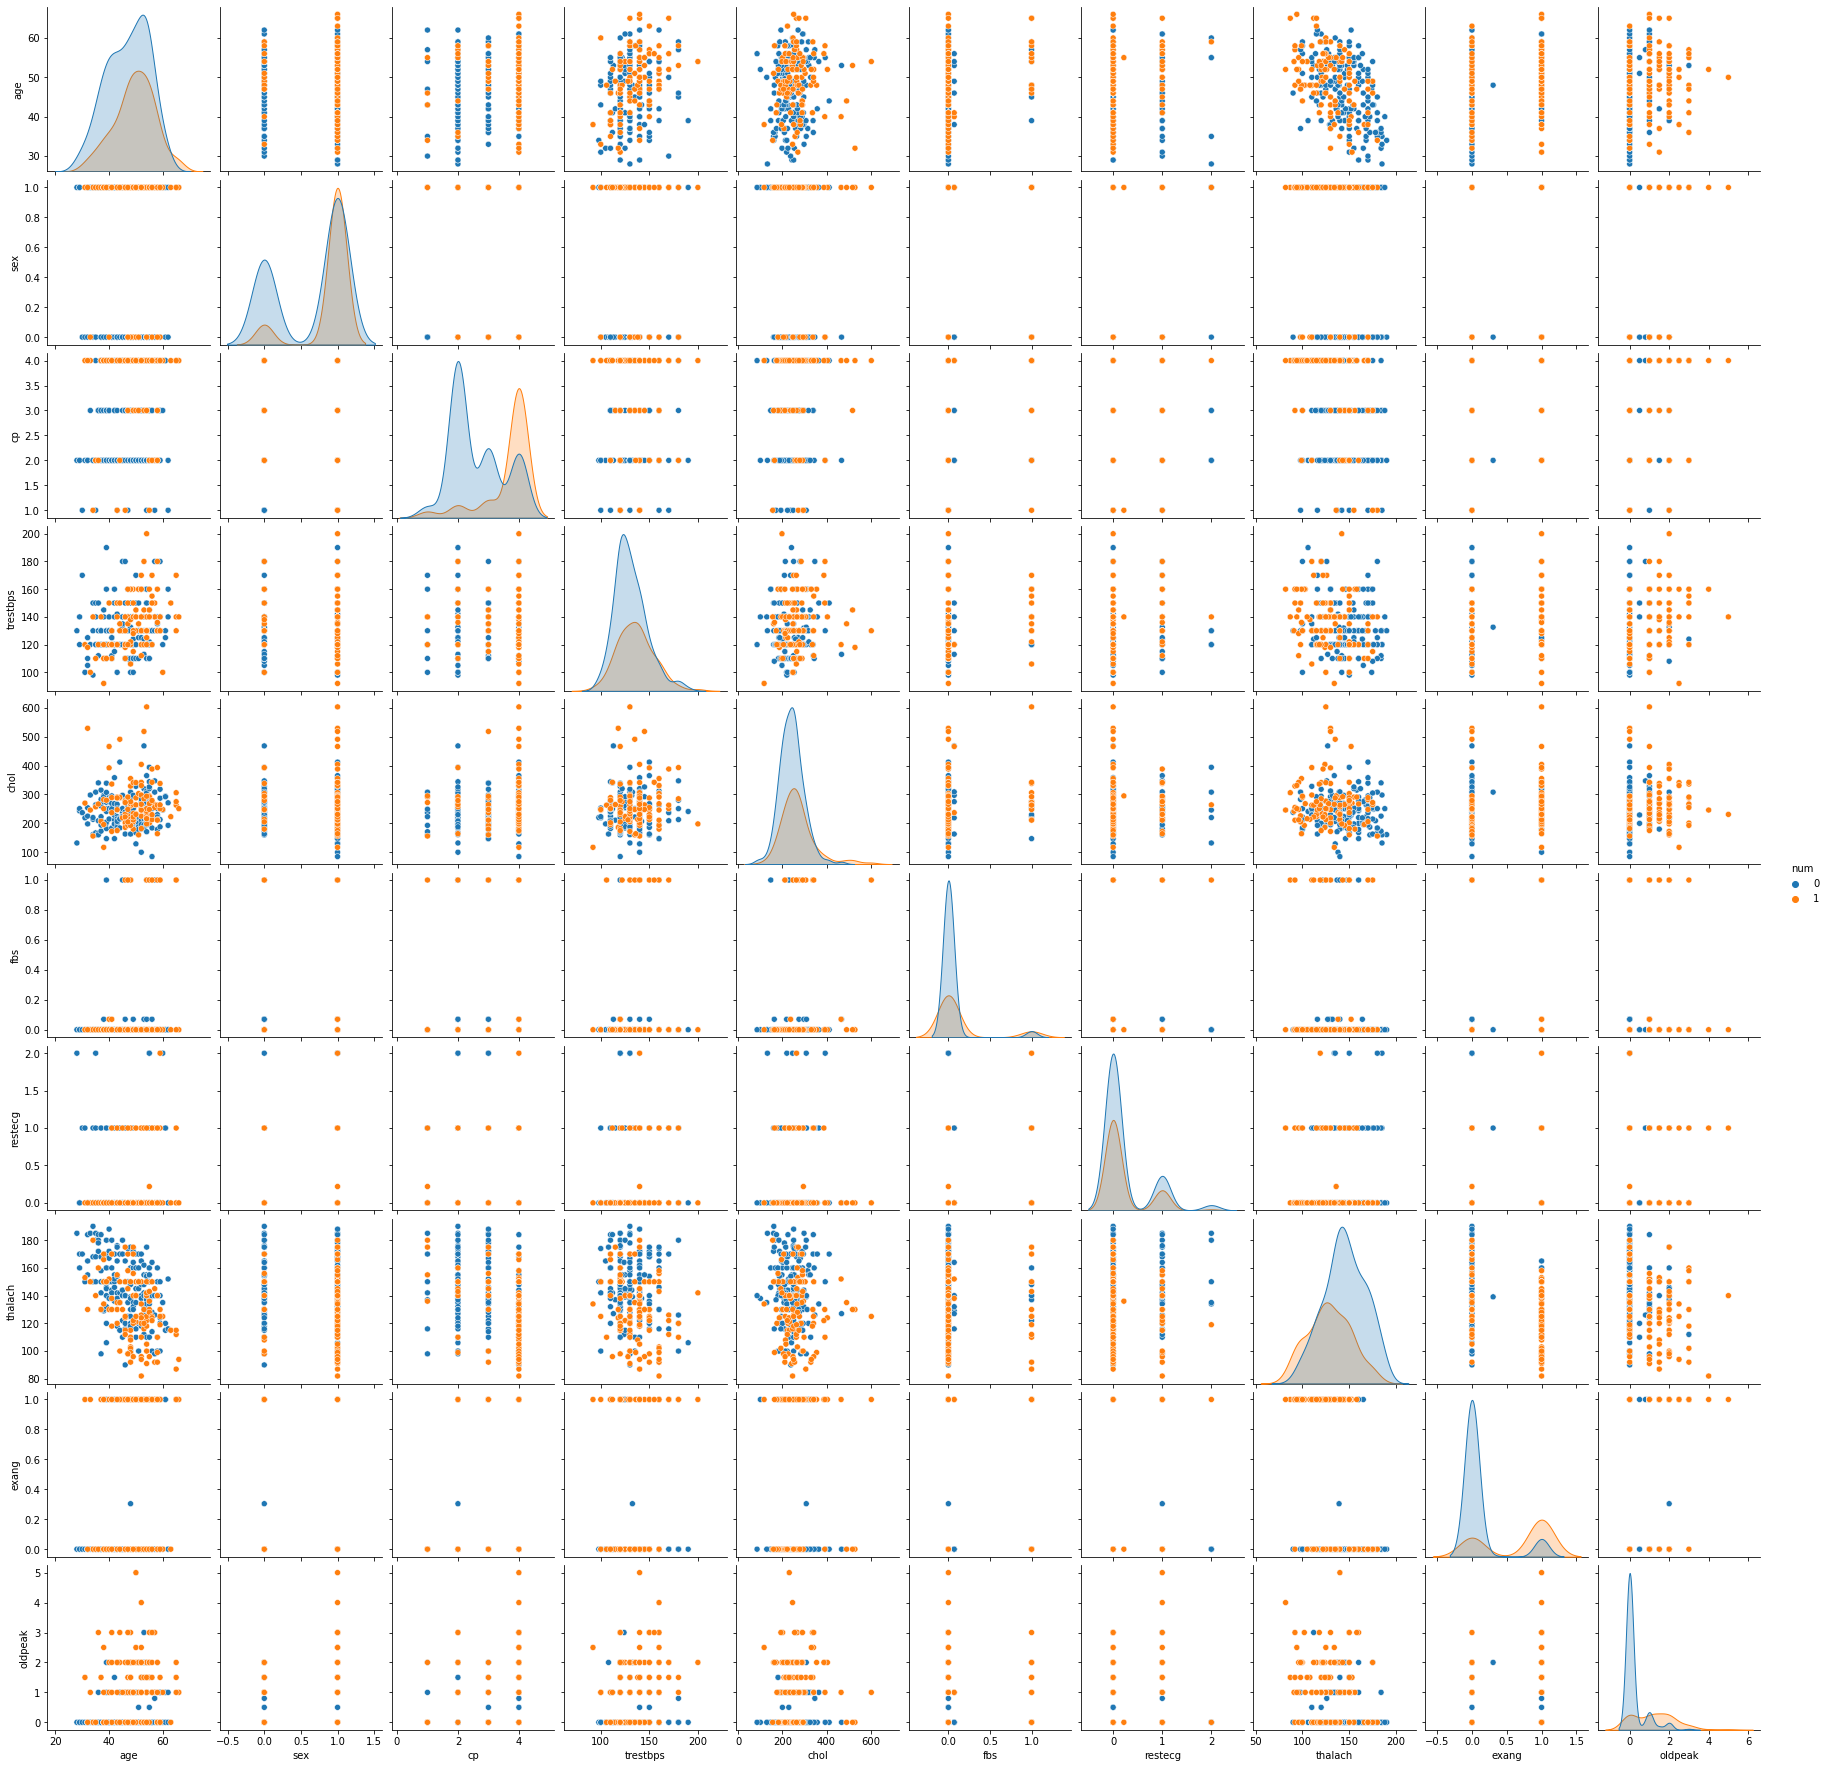

In [20]:
sns.pairplot(data, hue='num')

In [21]:
data.groupby(by='num').sex.value_counts()

num  sex
0    1      119
     0       69
1    1       94
     0       12
Name: sex, dtype: int64

### Refactor the data loading code

In [24]:
def load_heart_disease():
    '''Load and pre-process heart disease data
    
    assumes processed.hungarian.data file is present.
    
    download from
    https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
    
    return: data(DataFrame)
    
    '''
    
    data = pd.read_csv(r'C:\Users\mitra\Downloads\heat_disease\processed.hungarian.data', 
                   na_values='?', 
                   names=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                            'ca', 'thal', 'num'])
    
    # drop columns with many missing data
    data = data.drop(columns=['slope', 'ca', 'thal'])
    
    # fill in remaining missing data with mean() per column
    data = data.fillna(data.mean())
    
    return data

In [25]:
data2 = load_heart_disease()

data.equals(data2)

True

### Create feature matrix and target vector 

In [26]:
X = data.drop(columns='num')
y = data['num']
print(X.shape)
print(y.shape)

(294, 10)
(294,)


### Create training and test sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=31)

print(X_train.shape)
print(X_test.shape)

(264, 10)
(30, 10)


In [28]:
y_train.value_counts()

0    169
1     95
Name: num, dtype: int64

In [29]:
y_test.value_counts()

0    19
1    11
Name: num, dtype: int64

## Apply `LogisticRegression()` and evaluate the performance 

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Cross validation 

Are we over- or underfitting?

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.86792453, 0.88679245, 0.88679245, 0.77358491, 0.76923077])

In [32]:
scores.mean()

0.8368650217706822

In [33]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)
scores

{'fit_time': array([0.16990733, 0.13761806, 0.11270976, 0.09250927, 0.09389639]),
 'score_time': array([0.00100017, 0.00200105, 0.00200009, 0.00150752, 0.0019958 ]),
 'test_score': array([0.86792453, 0.88679245, 0.88679245, 0.77358491, 0.76923077]),
 'train_score': array([0.83412322, 0.84834123, 0.83886256, 0.86255924, 0.87264151])}

In [34]:
for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    print('{}= {:.3f}'.format(label_pair[1], scores[label_pair[0]].mean()))

train_score= 0.851
validation_score= 0.837


Looks pretty close. We are likely underfitting and would need a more complex model to increase validation set accuracy.

Lets try and play with `C`. We need more/**less** regularization and a **higher**/lower `C`.

In [35]:
model = LogisticRegression(C=100, max_iter=1000)
model.fit(X_train, y_train)
scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)
for label_pair in [ ('train_score', 'train_score'), ('test_score', 'validation_score')]:
    print('{}= {:.3f}'.format(label_pair[1], scores[label_pair[0]].mean()))

train_score= 0.852
validation_score= 0.837


Does not seem to help. We need a more complex model. We will get back to it next week.

### Compare training and test accuracy


In [36]:
model.score(X_train, y_train)

0.8446969696969697

In [37]:
model.score(X_test, y_test)

0.8333333333333334

### The confusion matrix on the test set 

Your thoughts?

Text(91.68, 0.5, 'true value')

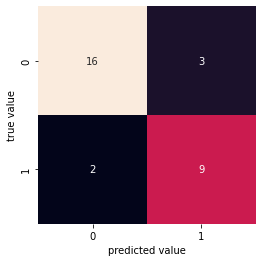

In [38]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

There are two cases were the classifier says *no heart disease* but these patients do have a *heart disease*. These are  false negatives - we miss patients with the disease.

There are three cases were the classifier says *heart disease* but these patients do *not* have a *heart disease*. These are false positives - we diagnose disease when there is none.

### Summarize the different scores 

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)

print('training accuracy (all data) {:.3f}'.format(model.score(X_train, y_train)))

print('training accuracy (cross-validation) {:.3f}'.format(scores['train_score'].mean()))

print('validation accuracy (cross-validation) {:.3f}'.format(scores['test_score'].mean()))

print('test accuracy (new data) {:.3f}'.format(model.score(X_test, y_test)))

training accuracy (all data) 0.845
training accuracy (cross-validation) 0.851
validation accuracy (cross-validation) 0.837
test accuracy (new data) 0.833
